In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Breast Cancer 데이터셋 가져오기(출처: UCI ML Repository)
#uci_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/\breast-cancer-wisconsin/breast-cancer-wisconsin.data"
df = pd.read_csv("breast-cancer-wisconsin.data", header = None)

In [ ]:
df.columns = ["id", "clump", "cell_size", "cell_shape", "adhension", "epithial", "bare_nuclei", "chromatin", "normal_nubleoli", "mitoses", "class"]

In [ ]:
pd.set_option("display.max_columns", 15)
df.head()

,id,clump,cell_size,cell_shape,adhension,epithial,bare_nuclei,chromatin,normal_nubleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhension        699 non-null    int64 
 5   epithial         699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nubleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
df.describe()

,id,clump,cell_size,cell_shape,adhension,epithial,chromatin,normal_nubleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
df["bare_nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
df["bare_nuclei"].replace("?", np.nan, inplace = True)
df.dropna(subset = ["bare_nuclei"], axis = 0, inplace = True)
df["bare_nuclei"] = df["bare_nuclei"].astype("int")
df.describe()

,id,clump,cell_size,cell_shape,adhension,epithial,bare_nuclei,chromatin,normal_nubleoli,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
X = df[["id", "clump", "cell_size", "cell_shape", "adhension", "epithial", "bare_nuclei", "chromatin", "normal_nubleoli", "mitoses"]]
y = df["class"]

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
tree_model.fit(X_train, y_train)
y_hat = tree_model.predict(X_test)

In [ ]:
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
tree_matrix

array([[127,   4],
       [  2,  72]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_hat)
print("정확도", accuracy)

정확도 0.9707317073170731


In [ ]:
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_model,
    out_file = "decision_example.dot",
    feature_names = df.columns[0:10],
    class_names = ["benign", "malignant"],
    rounded = True,
    filled = True
)

In [ ]:
! pip install graphviz

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

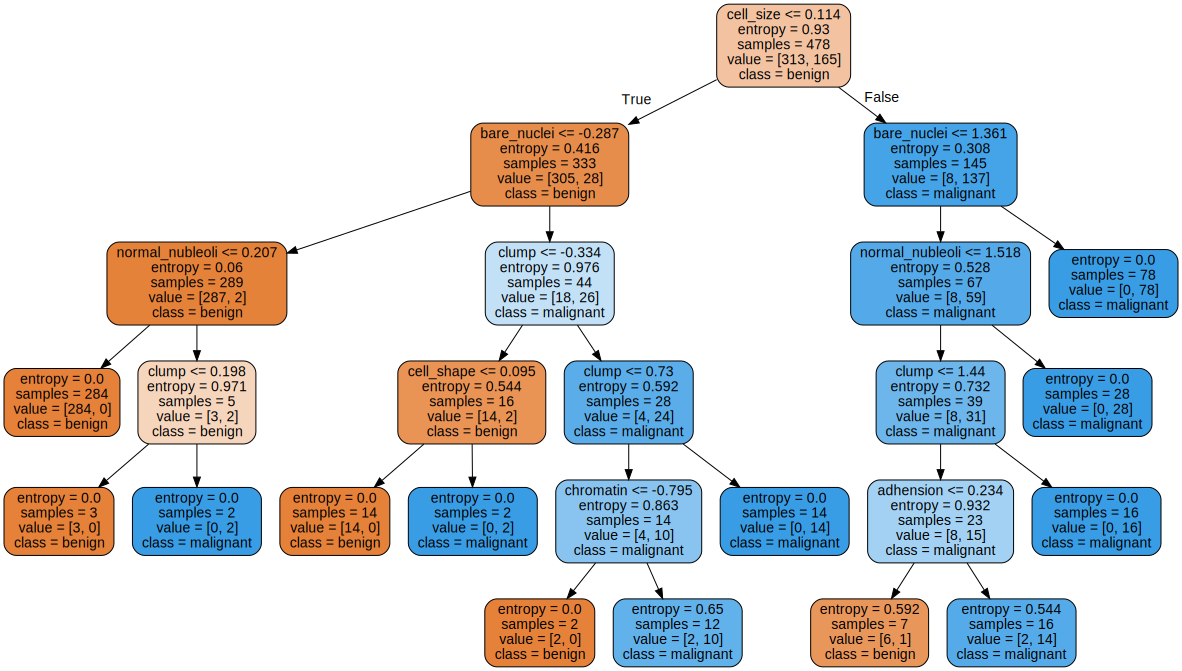

In [ ]:
import graphviz

with open("decision_example.dot", encoding = "UTF-8") as f:
    dot_graph = f.read()

dot = graphviz.Source(dot_graph, encoding = "UTF-8")

dot